In [1]:
from sqlalchemy import create_engine,text
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
db_user = ""
db_password = ""
db_host = "" 
db_port = ""  
db_name = ""

In [3]:
connection = f"postgresql://{db_user}:{db_password}@{db_host}:{db_port}/{db_name}"
engine = create_engine(connection)

In [4]:
query_datavalue = text("SELECT datavalue FROM movements;")
try:
    with engine.connect() as connection:
        chunks = pd.read_sql(query_datavalue, connection, chunksize=1000) 
        df_datavalue = pd.concat(chunks, ignore_index=True) 
    print(df_datavalue)
except Exception as e:
    print(f"Errore durante l'esecuzione della query: {e}")

          datavalue
0                 3
1                 3
2               141
3                 3
4                 6
...             ...
22962570          3
22962571          9
22962572        169
22962573          9
22962574          3

[22962575 rows x 1 columns]


In [5]:
df_datavalue.describe().apply(lambda x: round(x, 2))

,datavalue
count,22962575.00
mean,15.10
std,44.43
min,3.00
25%,3.00
50%,3.00
75%,9.00
max,3419.00


In [6]:
media = df_datavalue['datavalue'].mean()
mediana = df_datavalue['datavalue'].median()

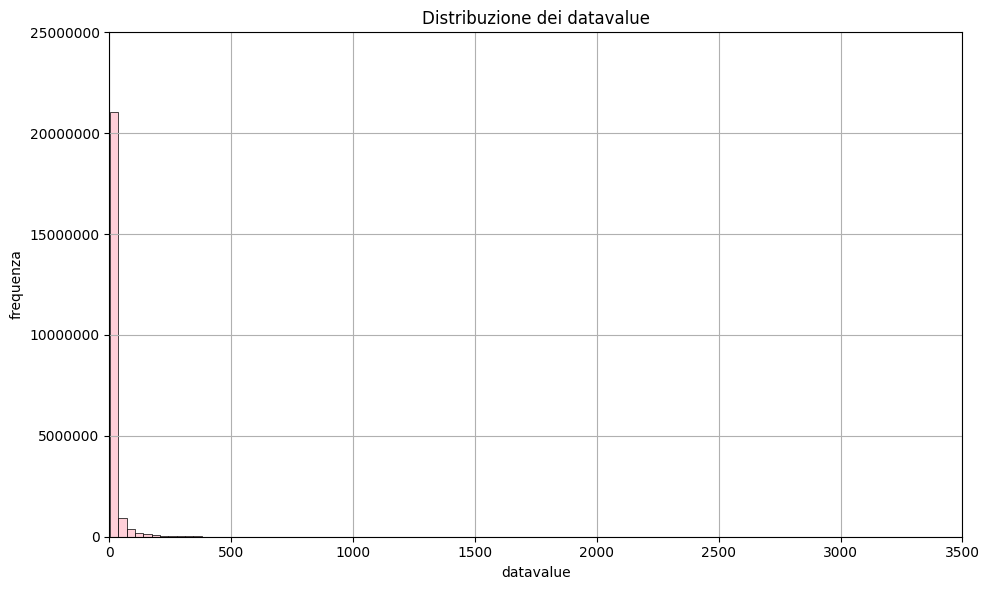

In [7]:
plt.figure(figsize=(10, 6))  # più alto per dare spazio
sns.histplot(df_datavalue['datavalue'], bins=100, kde=False, color='pink', edgecolor='black')

plt.title("Distribuzione dei datavalue")
plt.xlabel("datavalue")
plt.ylabel("frequenza")

# Zoom asse X fino a 20.000
plt.xlim(0, 3500)
plt.ylim(0, 25_000_000)

# Asse Y in notazione normale (senza 1e6)
plt.ticklabel_format(style='plain', axis='y')

plt.grid(True)
plt.tight_layout()
plt.show()

<Axes: xlabel='datavalue', ylabel='count'>

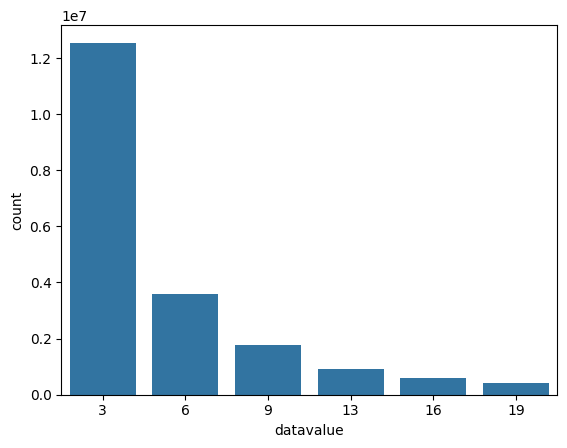

In [8]:
sns.countplot(x='datavalue', data=df_datavalue[df_datavalue['datavalue'] <= 20])

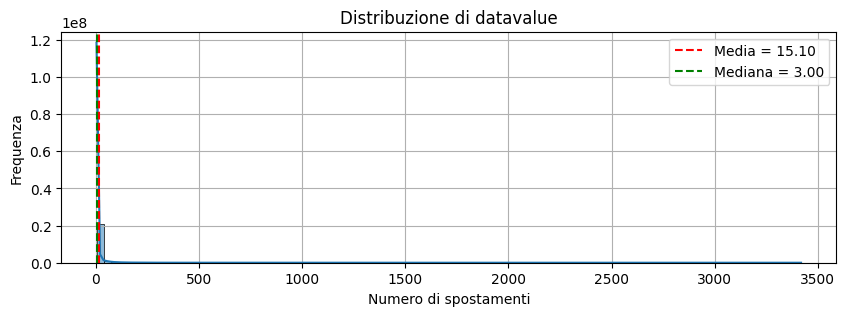

In [9]:
plt.figure(figsize=(10, 3))
sns.histplot(df_datavalue['datavalue'], bins=100, kde=True)
plt.axvline(media, color='red', linestyle='--', label=f'Media = {media:.2f}')
plt.axvline(mediana, color='green', linestyle='--', label=f'Mediana = {mediana:.2f}')
plt.legend()
plt.title("Distribuzione di datavalue")
plt.xlabel("Numero di spostamenti")
plt.ylabel("Frequenza")
plt.grid(True)
plt.show()

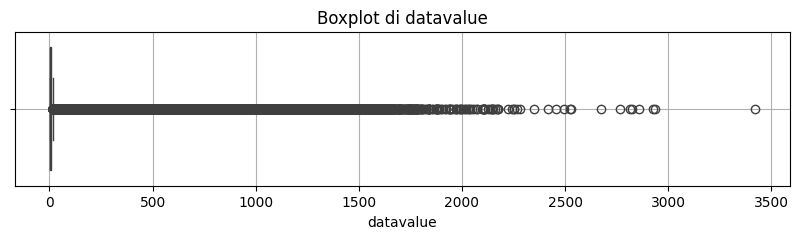

In [10]:
plt.figure(figsize=(10, 2))
sns.boxplot(data=df_datavalue, x='datavalue')
plt.title("Boxplot di datavalue")
plt.grid(True)
plt.show()

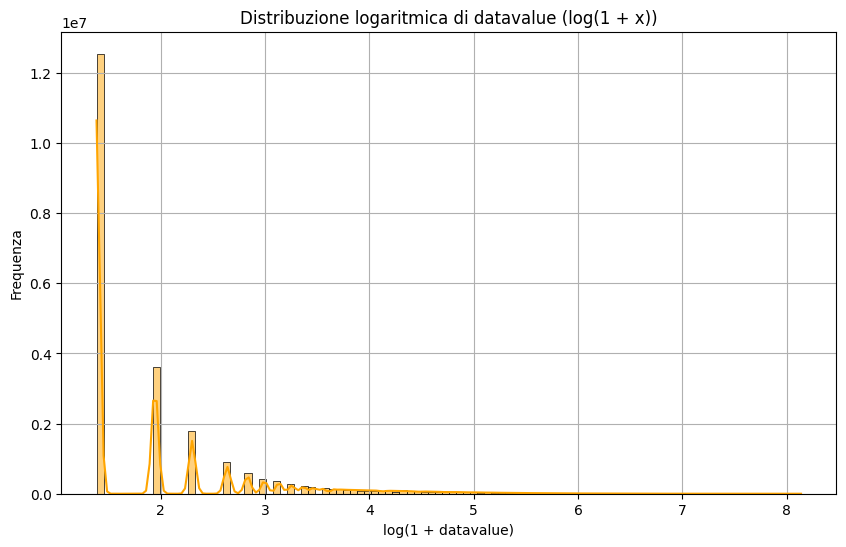

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(np.log1p(df_datavalue['datavalue']), bins=100, kde=True, color='orange')
plt.title("Distribuzione logaritmica di datavalue (log(1 + x))")
plt.xlabel("log(1 + datavalue)")
plt.ylabel("Frequenza")
plt.grid(True)
plt.show()

In [12]:
q90 = df_datavalue['datavalue'].quantile(0.9)
q99 = df_datavalue['datavalue'].quantile(0.99)

print(f"90% dei record ha un valore di datavalue <= {int(q90)}")
print(f"99% dei record ha un valore di datavalue <= {int(q99)}")

90% dei record ha un valore di datavalue <= 28
99% dei record ha un valore di datavalue <= 194


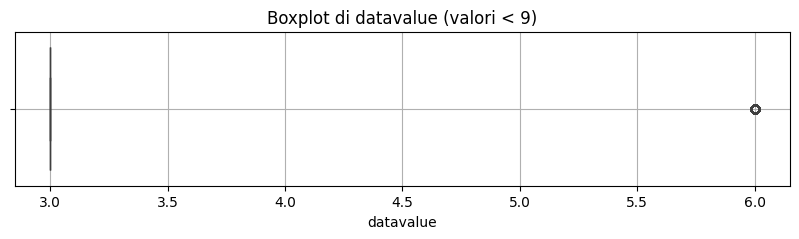

In [13]:
plt.figure(figsize=(10, 2))
sns.boxplot(data=df_datavalue[df_datavalue['datavalue'] < 9], x='datavalue')
plt.title("Boxplot di datavalue (valori < 9)")
plt.grid(True)
plt.show()

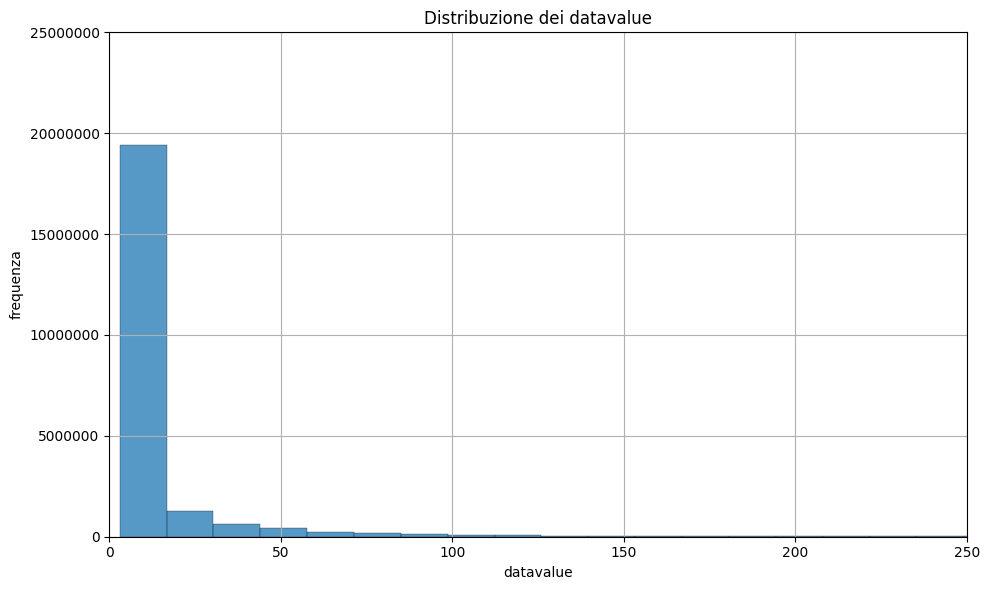

In [44]:
plt.figure(figsize=(10, 6))  # più alto per dare spazio
sns.histplot(df_datavalue['datavalue'], bins=250, kde=False, edgecolor='black')

plt.title("Distribuzione dei datavalue")
plt.xlabel("datavalue")
plt.ylabel("frequenza")

# Zoom asse X fino a 20.000
plt.xlim(0, 250)
plt.ylim(0, 25_000_000)

# Asse Y in notazione normale (senza 1e6)
plt.ticklabel_format(style='plain', axis='y')

plt.grid(True)
plt.tight_layout()
plt.show()